In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_data = pd.read_csv("train.csv")
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Check for missing values
print(titanic_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


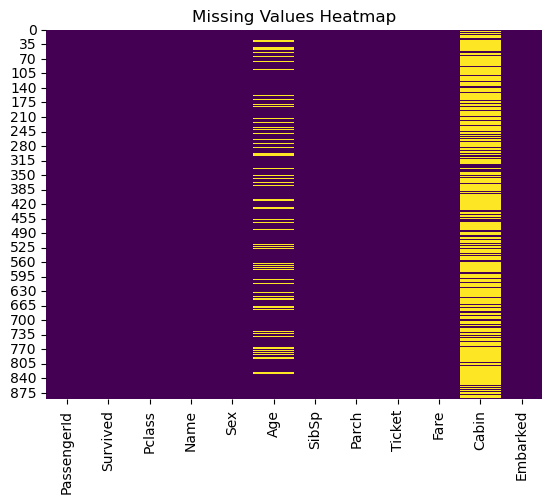

In [13]:
# Visualize missing data
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


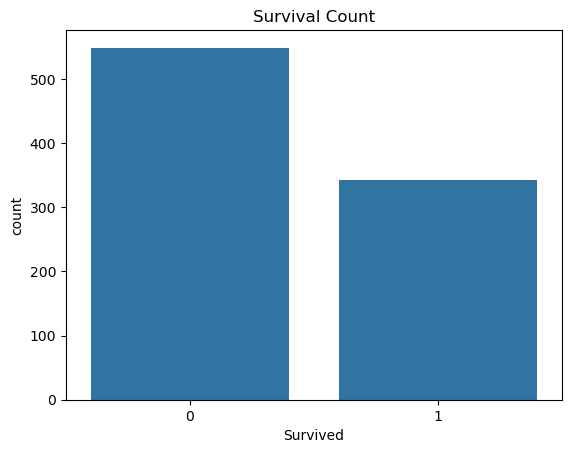

In [15]:
# Plot survival distribution
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()


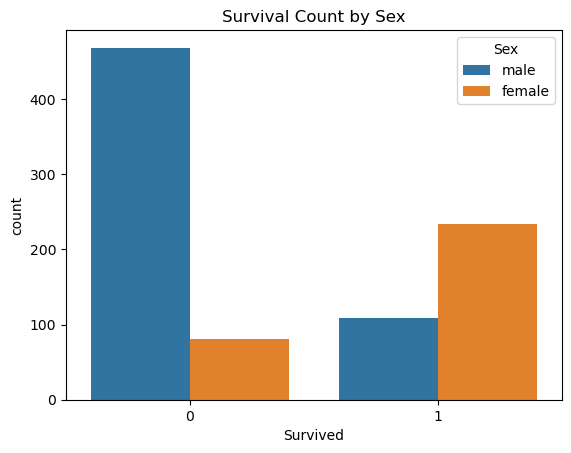

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [17]:
# Plot survival by sex
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Count by Sex')
plt.show()

# Calculate and print survival rates
print(titanic_data.groupby('Sex')['Survived'].mean())


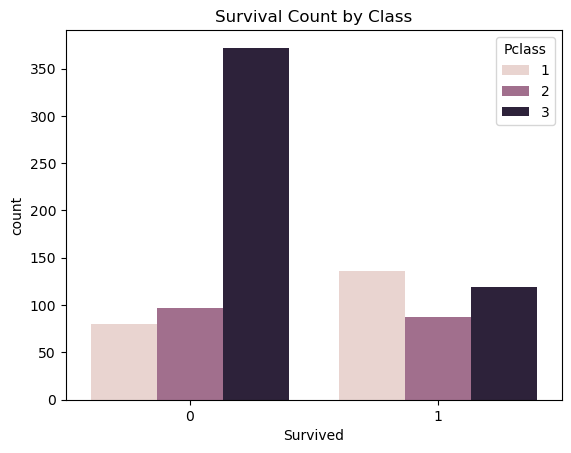

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [19]:
# Plot survival by class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival Count by Class')
plt.show()

# Calculate and print survival rates
print(titanic_data.groupby('Pclass')['Survived'].mean())


In [23]:
# Convert 'Sex' to numeric
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numeric
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [25]:
# Create a family size feature
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Create an is_alone feature
titanic_data['IsAlone'] = np.where(titanic_data['FamilySize'] > 1, 0, 1)


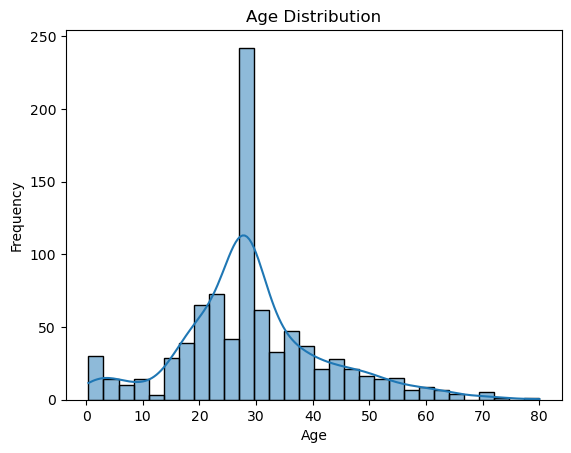

In [27]:
# Plot age distribution
sns.histplot(titanic_data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


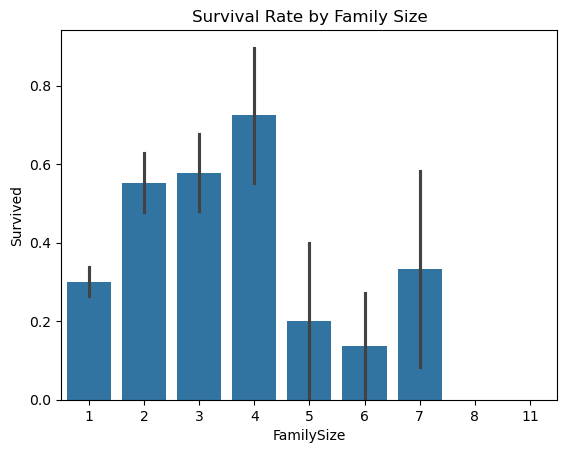

In [29]:
# Plot survival by family size
sns.barplot(x='FamilySize', y='Survived', data=titanic_data)
plt.title('Survival Rate by Family Size')
plt.show()
